<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Increasing the Home Value in Ames, IA

## Problem Statement

As of March 2022, the median home value in Ames, Iowa is 286,826 dollars. The median home value has not seen much consistency with year over year percent changes  in the past 5 years due to the housing crash in 2018-2019 and post COVID-19 economic effects in 2021-2022.

The city of Ames is interested in identifying ways in which they and their residents can do their part to help increase the city’s median home value in spite of the continuing post COVID-19 economic effects.

This project aims to identify specific housing features that have a high impact on a home’s value, so that the city knows what to consider when building new housing and residents know what to consider when building, updating or selling their home.


#### Contents:

* Background
* Exploratory Data Analysis & Cleaning
* Pre-Processing
* Model Exploration
* Production Model Insights
* Conclusions & Recommendations
* Kaggle Submissions

___

## Background

According to historical rates of home appreciation, the universal 'normal' rate of appreciation for the housing market is between 3-5%.  According to Zillow, the Ames, IA median home values for the past 5 years are as follows:

|**Month/Year**|**Median Home Value**|**Percent Change**|
|---|---|---|
|**March 2018**|234k|+4.0%|
|**March 2019**|234k|+0.0%|
|**March 2020**|239k|+2.1%|
|**March 2021**|249k|+4.2%|
|**March 2022**|289k|+15.1%|

The city has mostly fallen within the 2-4% range. The 2 exceptions are in 2019, due to the housing crash that began in the summer of 2018, and in 2022, due to the post COVID-19 economic effects.

### Dataset

The Ames, IA housing data set was obtained directly from the Ames Assessor’s Office. It contains 81 columns which include 22 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

____

## Exploratory Data Analysis & Cleaning

In [96]:
# Library Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [97]:
# Data Imports
ames_train = pd.read_csv('../data/train.csv')
ames_test = pd.read_csv('../data/test.csv')

In [98]:
ames_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [99]:
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [100]:
ames_train.shape, ames_test.shape

((2051, 81), (878, 80))

In [101]:
# Checking for null values
ames_train.isnull().sum().sort_values(ascending = False).loc[lambda x: x > 0]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
dtype: int64

In [102]:
# Checking dtypes
print(ames_train.dtypes.head(44))
print(ames_train.dtypes.tail(44))

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF 

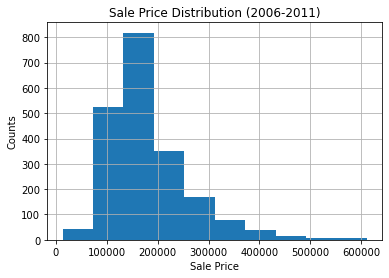

In [105]:
# Sale Price Histogram
ames_train['SalePrice'].hist()
plt.title('Sale Price Distribution (2006-2011)')
plt.xlabel('Sale Price')
plt.ylabel('Counts');

The distribution of the home sale prices is right skewed, with most home sale prices falling right below the 200,000 dollar mark.

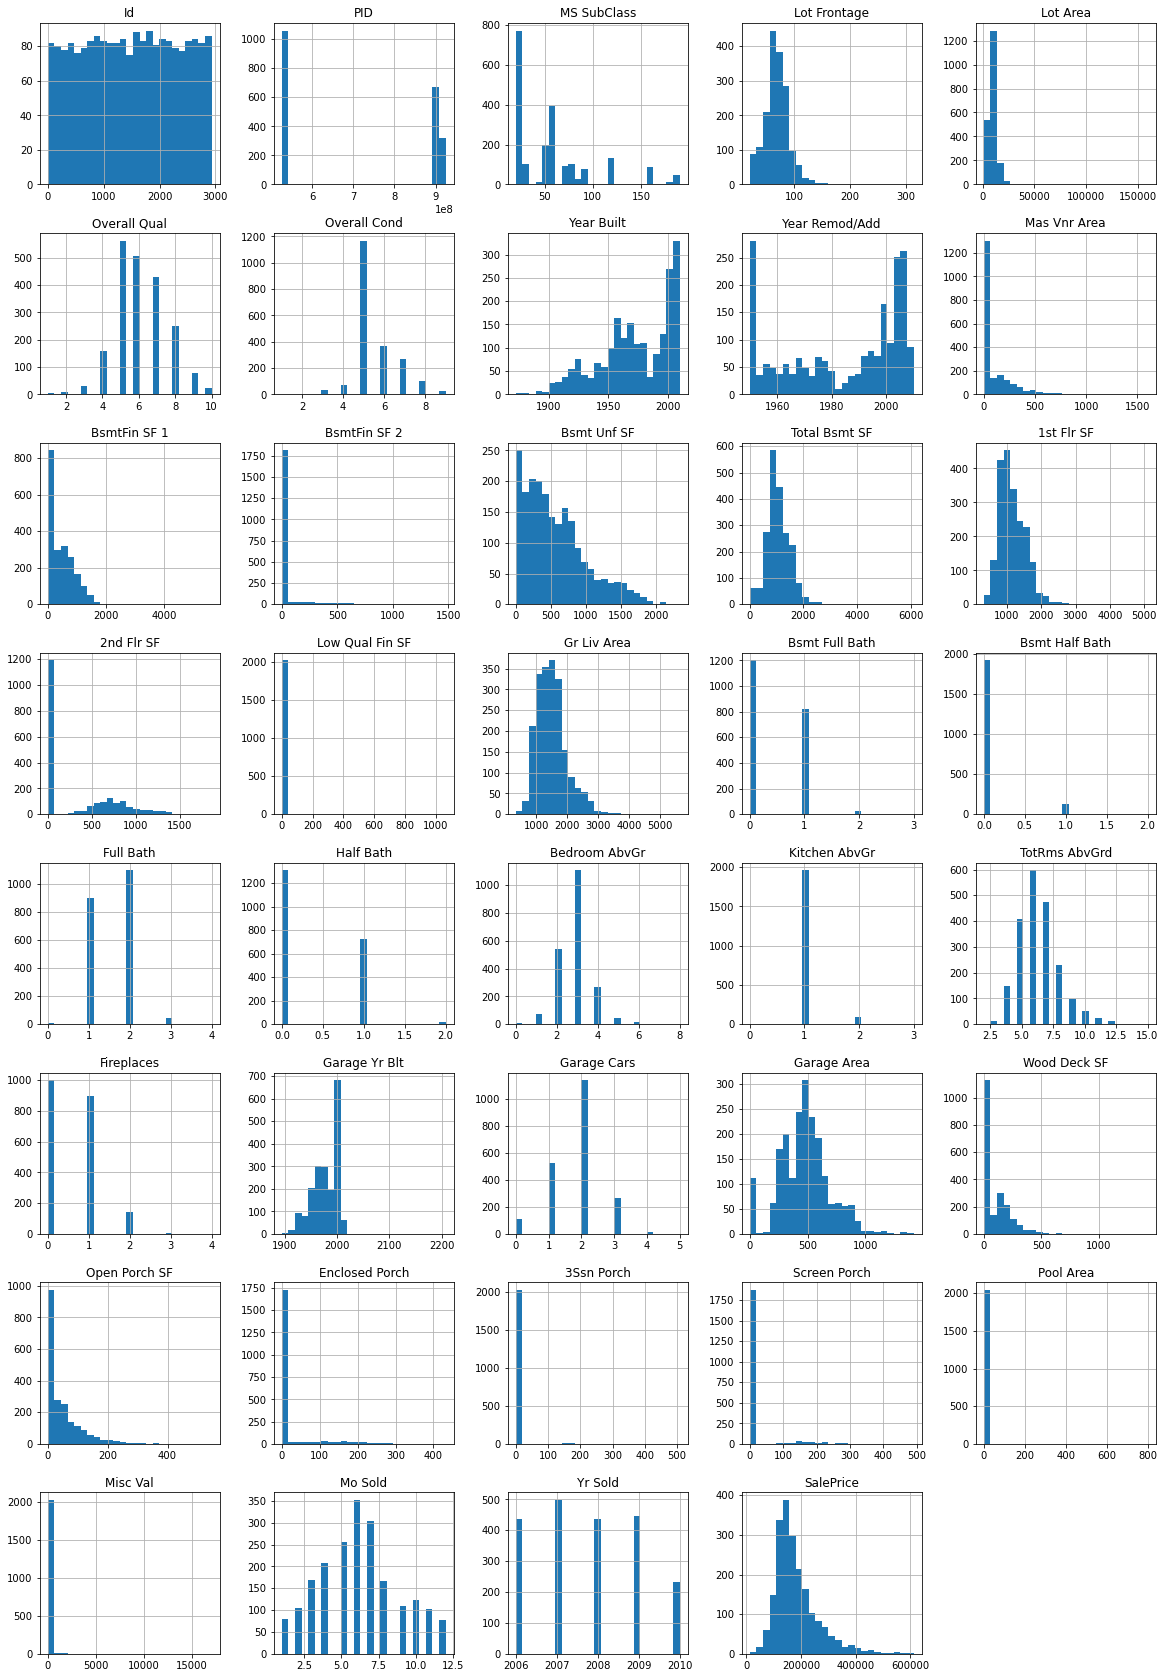

In [9]:
# Numerical Features Histograms
ames_train.hist(layout=(8,5), bins=25, figsize=(20,30));

At a glance, I can tell which numerical features will be good ones to focus on, and which won't be useful. The more distribution the better.

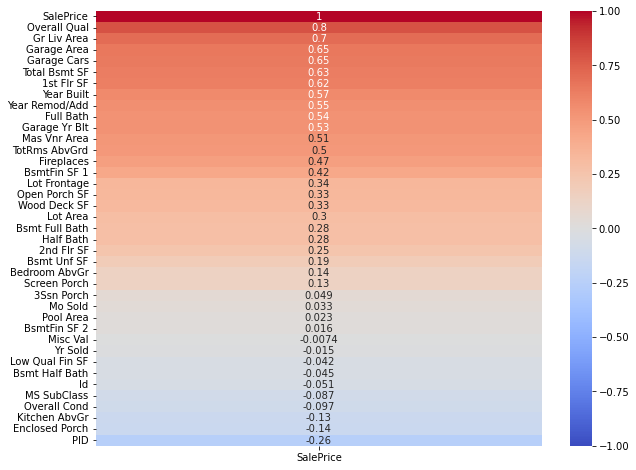

In [251]:
# Numerical Features Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(ames_train.corr()[['SalePrice']].sort_values(by=['SalePrice'], ascending=False), 
            vmin=-1, 
            vmax=1, 
            cmap='coolwarm', 
            annot=True);

To supplement the previous numerical feature histograms, this heatmap calls out which features are most highly correlated with the sale price of a home. Overall Quality, Above Ground Living Area, Garage Area, Garage Cars, Total Basement Square Footage and First Floor Square Footage will be top of mind through this analysis.

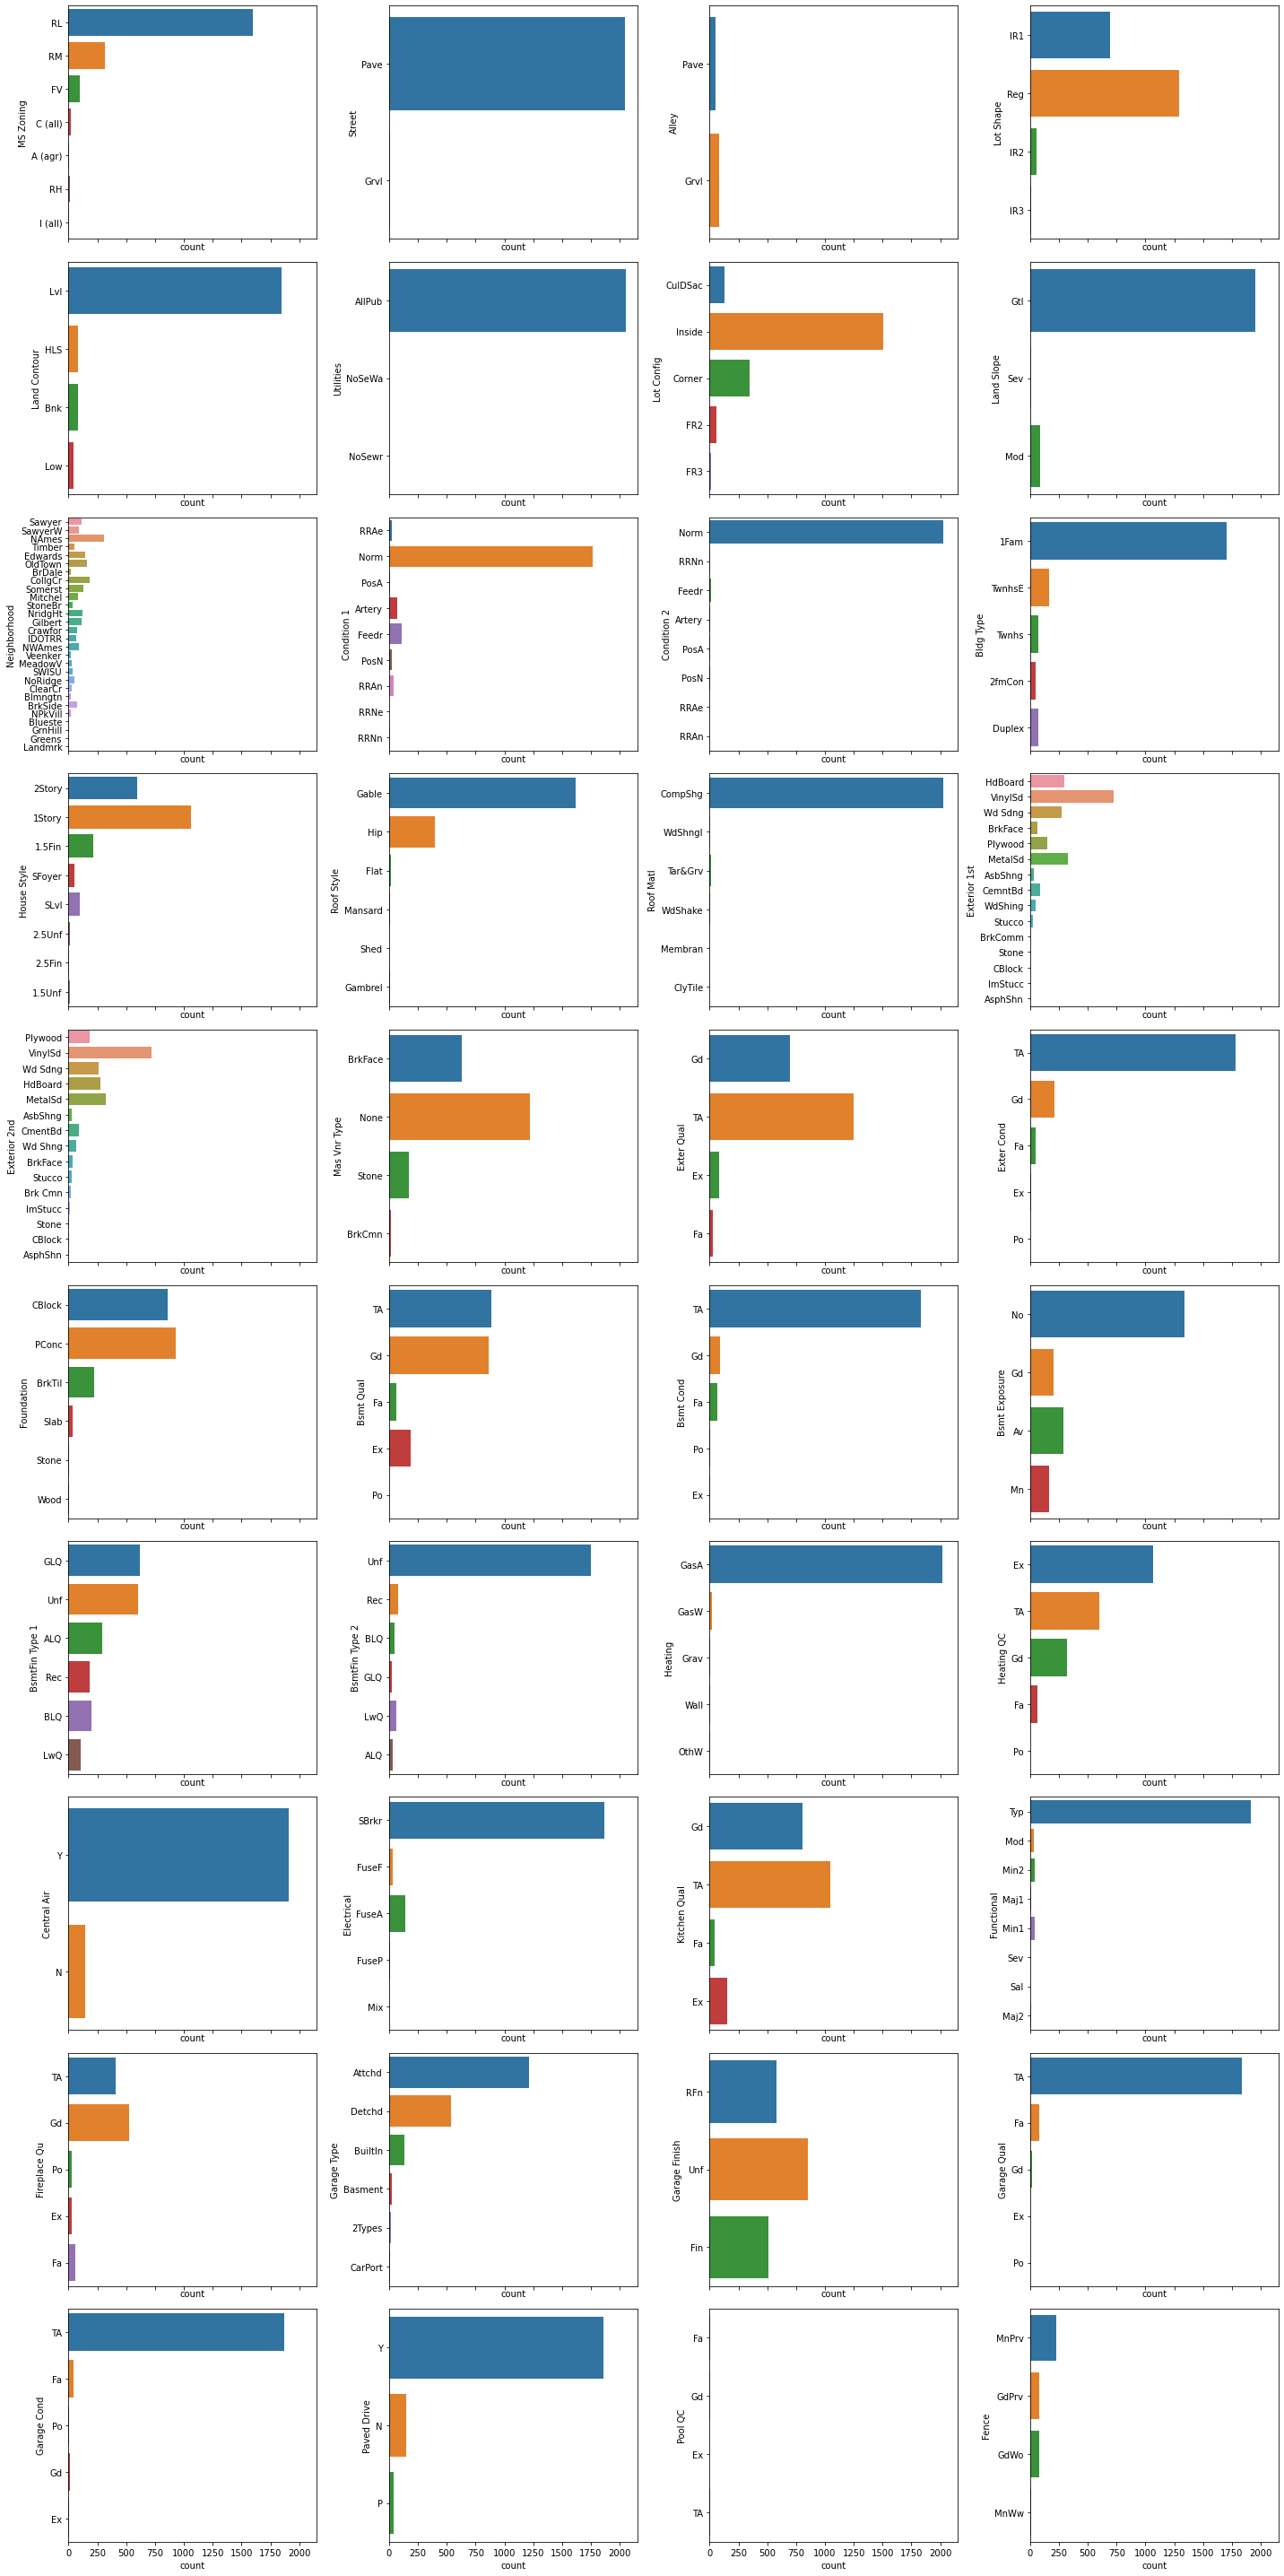

In [253]:
# Categorical Features Barcharts
fig, axes =plt.subplots(10,4, figsize=(20,40), sharex=True)
axes = axes.flatten()
object_cols = ames_train.dtypes == 'object'
for ax, catplot in zip(axes, ames_train.dtypes[object_cols].index):
    sns.countplot(y=catplot, data=ames_train, ax=ax)

plt.tight_layout()  
plt.show()

Similar to the numerical feature histrograms, at a glance, I can tell which categorical features will be good ones to focus on, and which won't be useful. The more variabillity the better.

In [12]:
# Replacing the null values in the numerical feature columns with 0
# Replacing the null values in the categorical feature columns with NA

ames_train['Pool QC'].replace(np.nan, 'NA', inplace=True)
ames_train['Misc Feature'].replace(np.nan, 'NA', inplace=True)
ames_train['Alley'].replace(np.nan, 'NA', inplace=True)
ames_train['Fence'].replace(np.nan, 'NA', inplace=True)
ames_train['Fireplace Qu'].replace(np.nan, 'NA', inplace=True)
ames_train['Lot Frontage'].replace(np.nan, 0, inplace=True)
ames_train['Garage Finish'].replace(np.nan, 'NA', inplace=True)
ames_train['Garage Qual'].replace(np.nan, 'NA', inplace=True)
ames_train['Garage Yr Blt'].replace(np.nan, 0, inplace=True)
ames_train['Garage Cond'].replace(np.nan, 'NA', inplace=True)
ames_train['Garage Type'].replace(np.nan, 'NA', inplace=True)
ames_train['Bsmt Exposure'].replace(np.nan, 'NA', inplace=True)
ames_train['BsmtFin Type 2'].replace(np.nan, 'NA', inplace=True)
ames_train['BsmtFin Type 1'].replace(np.nan, 'NA', inplace=True)
ames_train['Bsmt Cond'].replace(np.nan, 'NA', inplace=True)
ames_train['Bsmt Qual'].replace(np.nan, 'NA', inplace=True)
ames_train['Mas Vnr Area'].replace(np.nan, 0, inplace=True)
ames_train['Mas Vnr Type'].replace(np.nan, 'NA', inplace=True)
ames_train['Bsmt Half Bath'].replace(np.nan, 0, inplace=True)
ames_train['Bsmt Full Bath'].replace(np.nan, 0, inplace=True)
ames_train['Garage Area'].replace(np.nan, 0, inplace=True)
ames_train['Total Bsmt SF'].replace(np.nan, 0, inplace=True)
ames_train['Bsmt Unf SF'].replace(np.nan, 0, inplace=True)
ames_train['BsmtFin SF 2'].replace(np.nan, 0, inplace=True)
ames_train['BsmtFin SF 1'].replace(np.nan, 0, inplace=True)
ames_train['Garage Cars'].replace(np.nan, 0, inplace=True)

In [254]:
# Changing the column names to snake case
ames_train.columns = ames_train.columns.str.lower().str.replace(' ', '_')

____

## Pre-Processing

#### Train/Validation Set Split

In [14]:
X = ames_train.drop(columns = ['pid','saleprice'])
y = ames_train['saleprice']

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1640, 79), (411, 79), (1640,), (411,))

In [18]:
# Stashing id columns away and dropping from X_train & X_val
train_id = X_train['id']
val_id = X_val['id']

X_train.drop(columns = ['id'], inplace = True)
X_val.drop(columns = ['id'], inplace = True)

#### Transforming: One-Hot-Encoding & Scaling

In [19]:
# Help from here: 
# https://towardsdatascience.com/pipeline-columntransformer-and-featureunion-explained-f5491f815f

In [20]:
numerical = [col for col in X_train._get_numeric_data().columns]
categorical = [col for col in X_train.columns if col not in numerical]

In [21]:
cat_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))])

num_pipe = Pipeline([('ss', StandardScaler())])
    
transformer = ColumnTransformer([
    ('cat', cat_pipe, categorical),
    ('num', num_pipe, numerical)
])

In [22]:
Xt_train = transformer.fit_transform(X_train)
Xt_train = pd.DataFrame(Xt_train, columns = transformer.get_feature_names_out(X_train.columns))

In [23]:
Xt_val = transformer.transform(X_val)
Xt_val = pd.DataFrame(Xt_val, columns = transformer.get_feature_names_out(X_val.columns))

___

## Model Exploration

#### Linear Regression #1

* Linear Regression #1 is not good model. It does not do well at all with unseen data and is incredibly overfit.

In [24]:
lr = LinearRegression()

lr.fit(Xt_train, y_train)

LinearRegression()

In [25]:
lr.coef_

array([-1.35975312e+12, -1.35975308e+12, -1.35975306e+12, -1.35975306e+12,
       -1.35975307e+12, -1.35975307e+12,  8.35165178e+14,  8.35165178e+14,
        6.50553664e+14,  6.50553664e+14,  6.50553664e+14,  5.32852127e+14,
        5.32852127e+14,  5.32852127e+14,  5.32852127e+14, -1.97075151e+14,
       -1.97075151e+14, -1.97075151e+14, -1.97075151e+14, -1.08452766e+15,
       -1.67486541e+14, -1.67486541e+14, -1.67486541e+14, -1.67486541e+14,
       -1.67486541e+14,  2.24494181e+14,  2.24494181e+14,  2.24494181e+14,
       -2.30093927e+14, -2.30093927e+14, -2.30093927e+14, -2.30093927e+14,
       -2.30093927e+14, -2.30093927e+14, -2.30093927e+14, -2.30093927e+14,
       -2.30093927e+14, -2.30093927e+14, -2.30093927e+14, -2.30093927e+14,
       -2.30093927e+14, -2.30093927e+14, -2.30093927e+14, -2.30093927e+14,
       -2.30093927e+14, -2.30093927e+14, -2.30093927e+14, -2.30093927e+14,
       -2.30093927e+14, -2.30093927e+14, -2.30093927e+14, -2.30093927e+14,
       -2.30093927e+14, -

In [26]:
lr_coefs = pd.DataFrame({'feature': Xt_train.columns,'coefficient': lr.coef_})
lr_coefs.sort_values(by='coefficient', key=abs, ascending=False)

,feature,coefficient
72,cat__bldg_type_1Fam,1.168556e+15
73,cat__bldg_type_2fmCon,1.168556e+15
74,cat__bldg_type_Duplex,1.168556e+15
76,cat__bldg_type_TwnhsE,1.168556e+15
75,cat__bldg_type_Twnhs,1.168556e+15
...,...,...
298,num__mo_sold,-4.612656e+02
292,num__open_porch_sf,4.142812e+02
297,num__misc_val,3.431875e+02
281,num__bsmt_half_bath,3.333125e+02


In [31]:
cross_val_score(lr, Xt_train, y_train).mean()

-6.717120628956251e+20

In [27]:
lr.score(Xt_train, y_train)

0.943999472427162

In [28]:
lr.score(Xt_val, y_val)

-1.041851213443985e+18

In [29]:
mean_squared_error(y_train, lr.predict(Xt_train))**0.5

18876.90156188903

In [30]:
mean_squared_error(y_val, lr.predict(Xt_val))**0.5

78677665998553.22

#### RidgeCV #1

* RidgeCV #1 with the optimal alpha of 12.91549665014884 performed substantially better than Linear Regression #1. 

* The validation R2 score of 0.9148108834746805 far exceeded the cross validation score of 0.832332789187223 and beat the training R2 score of 0.9107801491804361 by a tad as well.

* The sale price predictions on the validation set were off by 22497.83224543844.

In [32]:
ridgecv = RidgeCV(alphas = np.logspace(0, 5, 10, 100))

ridgecv.fit(Xt_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]))

In [33]:
ridgecv.alpha_

12.91549665014884

In [34]:
ridgecv.coef_

array([-2.35494182e+03, -5.46421729e+03,  3.92989474e+03,  4.03680396e+03,
        1.98696953e+03, -2.13450913e+03, -3.67972513e+03,  3.67972513e+03,
        1.07534236e+03,  1.24305723e+03, -2.31839959e+03,  3.59017392e+03,
        8.48214051e+03, -1.50069287e+04,  2.93461428e+03, -1.02473328e+04,
        9.54635902e+03, -3.93577794e+02,  1.09455158e+03,  0.00000000e+00,
        9.18063435e+01,  6.14013879e+03, -3.00939218e+03, -3.85256996e+03,
        6.30017012e+02, -1.18379166e+03,  2.95588508e+03, -1.77209342e+03,
       -4.08775053e+03, -2.27095532e+03,  2.01481883e+03, -4.97270948e+02,
       -1.59274145e+03, -6.36464751e+03,  7.34709587e+03, -1.67480003e+04,
       -1.14035926e+04, -3.95417404e+02,  1.41552767e+04, -4.46860027e+03,
       -6.14750528e+02, -1.28632688e+03, -4.72897563e+03, -8.13701209e+03,
        1.60972112e+03, -8.75961737e+03,  1.90938809e+04,  2.10624475e+04,
       -7.27260691e+03, -3.18183983e+03, -6.52546245e+03, -7.79886910e+03,
        4.82915239e+03,  

In [35]:
ridgecv_coefs = pd.DataFrame({'feature': Xt_train.columns,'coefficient': ridgecv.coef_})
ridgecv_coefs.sort_values(by='coefficient', key=abs, ascending=False)

,feature,coefficient
53,cat__neighborhood_StoneBr,27595.085721
91,cat__roof_matl_ClyTile,-23747.714515
47,cat__neighborhood_NridgHt,21062.447451
46,cat__neighborhood_NoRidge,19093.880896
132,cat__exter_qual_Ex,18994.015393
...,...,...
191,cat__electrical_FuseF,-44.643801
281,num__bsmt_half_bath,38.909307
70,cat__condition_2_RRAn,-13.916859
274,num__bsmt_unf_sf,6.486745


In [40]:
cross_val_score(ridgecv, Xt_train, y_train).mean()

0.832332789187223

In [36]:
ridgecv.score(Xt_train, y_train)

0.9107801491804361

In [37]:
ridgecv.score(Xt_val, y_val)

0.9148108834746805

In [38]:
mean_squared_error(y_train, ridgecv.predict(Xt_train))**0.5

23826.782379837325

In [39]:
mean_squared_error(y_val, ridgecv.predict(Xt_val))**0.5

22497.83224543844

#### RidgeCV #2

Since my best alpha was 12.91549665014884 in RidgeCV #1, I tried digging a little deeper to see if I could find a better alpha, but was unable to.

In [42]:
ridgecv2 = RidgeCV(alphas = np.linspace(1, 25, 100), cv=15)

ridgecv2.fit(Xt_train, y_train)

RidgeCV(alphas=array([ 1.        ,  1.24242424,  1.48484848,  1.72727273,  1.96969697,
        2.21212121,  2.45454545,  2.6969697 ,  2.93939394,  3.18181818,
        3.42424242,  3.66666667,  3.90909091,  4.15151515,  4.39393939,
        4.63636364,  4.87878788,  5.12121212,  5.36363636,  5.60606061,
        5.84848485,  6.09090909,  6.33333333,  6.57575758,  6.81818182,
        7.06060606,  7.3030303 ,  7.54545455,  7.78787879,  8.03030303,
        8.272727...
       17.96969697, 18.21212121, 18.45454545, 18.6969697 , 18.93939394,
       19.18181818, 19.42424242, 19.66666667, 19.90909091, 20.15151515,
       20.39393939, 20.63636364, 20.87878788, 21.12121212, 21.36363636,
       21.60606061, 21.84848485, 22.09090909, 22.33333333, 22.57575758,
       22.81818182, 23.06060606, 23.3030303 , 23.54545455, 23.78787879,
       24.03030303, 24.27272727, 24.51515152, 24.75757576, 25.        ]),
        cv=15)

In [43]:
ridgecv.alpha_

12.91549665014884

#### LassoCV #1

* LassoCV #1 with the optimal alpha of 46.4158883361278 performed better than RidgeCV #1. 

* The validation R2 score of 0.9356412511488261 far exceeded the cross validation score of 0.838402361575566. Though it did not beat the training R2 score of 0.9356412511488261, the scores are still better than those achieved with RidgeCV #1.

* The sale price predictions on the validation set were off by 20758.74190888941, which is less than RidgeCV #1.

In [44]:
lassocv = LassoCV(alphas = np.logspace(0, 5, 10, 100))

lassocv.fit(Xt_train, y_train)

LassoCV(alphas=array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]))

In [45]:
lassocv.alpha_

46.4158883361278

In [46]:
lassocv.coef_

array([-0.00000000e+00, -4.05016879e+03,  3.76925028e+03,  0.00000000e+00,
        5.96216700e+02, -2.11038939e+03, -2.86241270e+02,  6.13049493e-11,
        0.00000000e+00,  0.00000000e+00, -3.20065238e+03, -3.46998229e+01,
        4.18826885e+03, -3.69123342e+03,  6.00225195e+00, -2.03220226e+03,
        9.99635530e+03, -1.77242770e+03,  8.60695478e+02,  0.00000000e+00,
       -0.00000000e+00,  4.71774828e+03, -1.22670435e+03, -0.00000000e+00,
        6.88383044e+02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.63831371e+03,
        0.00000000e+00, -0.00000000e+00,  1.20864046e+04, -8.91527288e+03,
       -4.10270305e+03,  0.00000000e+00,  7.51850871e+04, -6.95477640e+02,
       -0.00000000e+00,  0.00000000e+00, -3.21941033e+02, -2.90515126e+03,
        3.28796689e+03, -3.86741235e+03,  2.70052276e+04,  2.35238978e+04,
       -3.02755415e+03, -0.00000000e+00, -0.00000000e+00, -1.84484172e+03,
        8.97921918e+03,  

In [94]:
lassocv_coefs = pd.DataFrame({'feature': Xt_train.columns,'coefficient': lassocv.coef_})
lassocv_coefs.sort_values(by='coefficient', key=abs, ascending=False)

,feature,coefficient
91,cat__roof_matl_ClyTile,-498180.565702
249,cat__misc_feature_Elev,-345221.681864
38,cat__neighborhood_GrnHill,75185.087126
53,cat__neighborhood_StoneBr,42267.535644
96,cat__roof_matl_WdShngl,40655.768829
...,...,...
134,cat__exter_qual_Gd,0.000000
136,cat__exter_cond_Ex,0.000000
137,cat__exter_cond_Fa,0.000000
139,cat__exter_cond_Po,-0.000000


In [52]:
cross_val_score(lassocv, Xt_train, y_train).mean()

0.838402361575566

In [48]:
lassocv.score(Xt_train, y_train)

0.9356412511488261

In [49]:
lassocv.score(Xt_val, y_val)

0.9274721464439819

In [50]:
mean_squared_error(y_train, lassocv.predict(Xt_train))**0.5

20236.64197414387

In [51]:
mean_squared_error(y_val, lassocv.predict(Xt_val))**0.5

20758.74190888941

#### LassoCV #2

* Since my best alpha was 46.4158883361278 in LassoCV #1, I tried digging a little deeper to see if I could find a better alpha, but was unable to.

In [54]:
lassocv2 = LassoCV(alphas = np.linspace(40, 50, 100), cv=15)

lassocv2.fit(Xt_train, y_train)

LassoCV(alphas=array([40.        , 40.1010101 , 40.2020202 , 40.3030303 , 40.4040404 ,
       40.50505051, 40.60606061, 40.70707071, 40.80808081, 40.90909091,
       41.01010101, 41.11111111, 41.21212121, 41.31313131, 41.41414141,
       41.51515152, 41.61616162, 41.71717172, 41.81818182, 41.91919192,
       42.02020202, 42.12121212, 42.22222222, 42.32323232, 42.42424242,
       42.52525253, 42.62626263, 42.72727273, 42.8...
       47.07070707, 47.17171717, 47.27272727, 47.37373737, 47.47474747,
       47.57575758, 47.67676768, 47.77777778, 47.87878788, 47.97979798,
       48.08080808, 48.18181818, 48.28282828, 48.38383838, 48.48484848,
       48.58585859, 48.68686869, 48.78787879, 48.88888889, 48.98989899,
       49.09090909, 49.19191919, 49.29292929, 49.39393939, 49.49494949,
       49.5959596 , 49.6969697 , 49.7979798 , 49.8989899 , 50.        ]),
        cv=15)

In [55]:
lassocv.alpha_

46.4158883361278

#### ElasticNet #1

* ElasticNet #1 with the optimal alpha of 0.016121212121212123 performed similarly to RidgeCV #1, and therefore did not perform as well as LassoCV #1.

In [56]:
enetcv = ElasticNetCV(alphas = np.linspace(.001, .5, 100), l1_ratio = 0.5, cv=10)

In [57]:
enetcv.fit(Xt_train, y_train)

ElasticNetCV(alphas=array([0.001     , 0.0060404 , 0.01108081, 0.01612121, 0.02116162,
       0.02620202, 0.03124242, 0.03628283, 0.04132323, 0.04636364,
       0.05140404, 0.05644444, 0.06148485, 0.06652525, 0.07156566,
       0.07660606, 0.08164646, 0.08668687, 0.09172727, 0.09676768,
       0.10180808, 0.10684848, 0.11188889, 0.11692929, 0.1219697 ,
       0.1270101 , 0.13205051, 0.13709091, 0.14213131, 0.14717172,
       0...
       0.32862626, 0.33366667, 0.33870707, 0.34374747, 0.34878788,
       0.35382828, 0.35886869, 0.36390909, 0.36894949, 0.3739899 ,
       0.3790303 , 0.38407071, 0.38911111, 0.39415152, 0.39919192,
       0.40423232, 0.40927273, 0.41431313, 0.41935354, 0.42439394,
       0.42943434, 0.43447475, 0.43951515, 0.44455556, 0.44959596,
       0.45463636, 0.45967677, 0.46471717, 0.46975758, 0.47479798,
       0.47983838, 0.48487879, 0.48991919, 0.4949596 , 0.5       ]),
             cv=10)

In [58]:
enetcv.alpha_

0.016121212121212123

In [59]:
enetcv.coef_

array([-2.31879987e+03, -5.39511392e+03,  3.90598377e+03,  3.96985941e+03,
        1.98916934e+03, -2.15109827e+03, -3.64500292e+03,  3.64500292e+03,
        1.06994162e+03,  1.24384475e+03, -2.31478648e+03,  3.54654991e+03,
        8.41038687e+03, -1.48381494e+04,  2.87921533e+03, -1.02287200e+04,
        9.52416577e+03, -3.77956794e+02,  1.08251136e+03,  0.00000000e+00,
        6.88292277e+01,  6.12484787e+03, -3.01178628e+03, -3.79577670e+03,
        6.12885471e+02, -1.19201042e+03,  2.93925020e+03, -1.74623971e+03,
       -4.07317574e+03, -2.24022854e+03,  1.97015535e+03, -4.33328600e+02,
       -1.55857862e+03, -6.34527367e+03,  7.34587415e+03, -1.66520246e+04,
       -1.13567405e+04, -3.98116484e+02,  1.38780026e+04, -4.39620804e+03,
       -6.00751641e+02, -1.27834270e+03, -4.67601662e+03, -8.05909167e+03,
        1.56757844e+03, -8.69030342e+03,  1.89651002e+04,  2.09563286e+04,
       -7.18357345e+03, -3.11649267e+03, -6.45022677e+03, -7.75672093e+03,
        4.79634359e+03,  

In [60]:
enetcv_coefs = pd.DataFrame({'feature': Xt_train.columns,'coefficient': enetcv.coef_})
enetcv_coefs.sort_values(by='coefficient', key=abs, ascending=False)

,feature,coefficient
53,cat__neighborhood_StoneBr,27358.487324
91,cat__roof_matl_ClyTile,-23273.589183
47,cat__neighborhood_NridgHt,20956.328614
46,cat__neighborhood_NoRidge,18965.100169
132,cat__exter_qual_Ex,18905.775840
...,...,...
191,cat__electrical_FuseF,-48.297526
281,num__bsmt_half_bath,34.203397
70,cat__condition_2_RRAn,-10.549094
274,num__bsmt_unf_sf,8.200817


In [65]:
cross_val_score(enetcv, Xt_train, y_train).mean()

0.8343740786564977

In [61]:
enetcv.score(Xt_train, y_train)

0.9105869354745427

In [62]:
enetcv.score(Xt_val, y_val)

0.9148157076118382

In [63]:
mean_squared_error(y_train, enetcv.predict(Xt_train))**0.5

23852.56795986418

In [64]:
mean_squared_error(y_val, enetcv.predict(Xt_val))**0.5

22497.195226477088

___

## Production Model Insights
* Using Lasso Regression (a = 46.4158883361278)

In [257]:
# Complete list of coefficients not zeroed out and greater than 0
lassocv_coefs_gr_0 = lassocv_coefs[lassocv_coefs['coefficient'] > 0]
lassocv_coefs_gr_0.sort_values(by='coefficient', key=abs, ascending=False).head(44)

,feature,coefficient
38,cat__neighborhood_GrnHill,75185.087126
53,cat__neighborhood_StoneBr,42267.535644
96,cat__roof_matl_WdShngl,40655.768829
132,cat__exter_qual_Ex,31542.381898
46,cat__neighborhood_NoRidge,27005.227573
47,cat__neighborhood_NridgHt,23523.897808
195,cat__kitchen_qual_Ex,18862.020288
60,cat__condition_1_PosN,13991.119132
226,cat__garage_qual_Gd,13945.499830
100,cat__exterior_1st_BrkFace,13443.532049


In [67]:
lassocv_coefs_gr_0.sort_values(by='coefficient', key=abs, ascending=False).tail(44)

,feature,coefficient
88,cat__roof_style_Hip,3.013565e+03
143,cat__foundation_PConc,2.943969e+03
286,num__totrms_abvgrd,2.877417e+03
282,num__full_bath,2.816705e+03
80,cat__house_style_2.5Fin,2.747386e+03
280,num__bsmt_full_bath,2.628325e+03
289,num__garage_cars,2.508568e+03
183,cat__heating_qc_Ex,2.271202e+03
201,cat__functional_Min1,2.229481e+03
202,cat__functional_Min2,2.182297e+03


In [256]:
# Complete list of coefficients not zeroed out and less than 0
lassocv_coefs_ls_0 = lassocv_coefs[lassocv_coefs['coefficient'] < 0]
print(lassocv_coefs_ls_0.shape)
lassocv_coefs_ls_0.sort_values(by='coefficient', key=abs, ascending=False).head(60)

(68, 2)


,feature,coefficient
91,cat__roof_matl_ClyTile,-498180.565702
249,cat__misc_feature_Elev,-345221.681864
255,cat__sale_type_COD,-12695.661550
89,cat__roof_style_Mansard,-12500.428749
127,cat__mas_vnr_type_BrkCmn,-10858.070927
199,cat__functional_Maj1,-10649.607342
35,cat__neighborhood_Edwards,-8915.272876
213,cat__garage_type_2Types,-7586.051368
263,cat__sale_type_WD,-6868.998345
61,cat__condition_1_RRAe,-6114.729911


In [91]:
lassocv_coefs_ls_0.sort_values(by='coefficient', key=abs, ascending=False).tail(8)

,feature,coefficient
194,cat__electrical_SBrkr,-2.144974e+02
110,cat__exterior_1st_Wd Sdng,-1.704564e+02
299,num__yr_sold,-7.610994e+01
198,cat__kitchen_qual_TA,-7.051621e+01
170,cat__bsmtfin_type_1_Unf,-5.325547e+01
11,cat__lot_shape_IR1,-3.469982e+01
281,num__bsmt_half_bath,-1.570467e+01
189,cat__central_air_Y,-1.968619e-12


In [258]:
# Neighborhood Features Specifically
lassocv_coefs_nbrh = lassocv_coefs[lassocv_coefs['feature'].str.contains('neighborhood')]
print(lassocv_coefs_nbrh.shape)
lassocv_coefs_nbrh_srt = lassocv_coefs_nbrh.sort_values(by='coefficient', ascending=False)
lassocv_coefs_nbrh_srt

(28, 2)


,feature,coefficient
38,cat__neighborhood_GrnHill,75185.087126
53,cat__neighborhood_StoneBr,42267.535644
46,cat__neighborhood_NoRidge,27005.227573
47,cat__neighborhood_NridgHt,23523.897808
34,cat__neighborhood_Crawfor,12086.404572
52,cat__neighborhood_Somerst,8979.219182
31,cat__neighborhood_BrkSide,3638.313711
44,cat__neighborhood_NPkVill,3287.966889
28,cat__neighborhood_Blmngtn,0.000000
29,cat__neighborhood_Blueste,0.000000


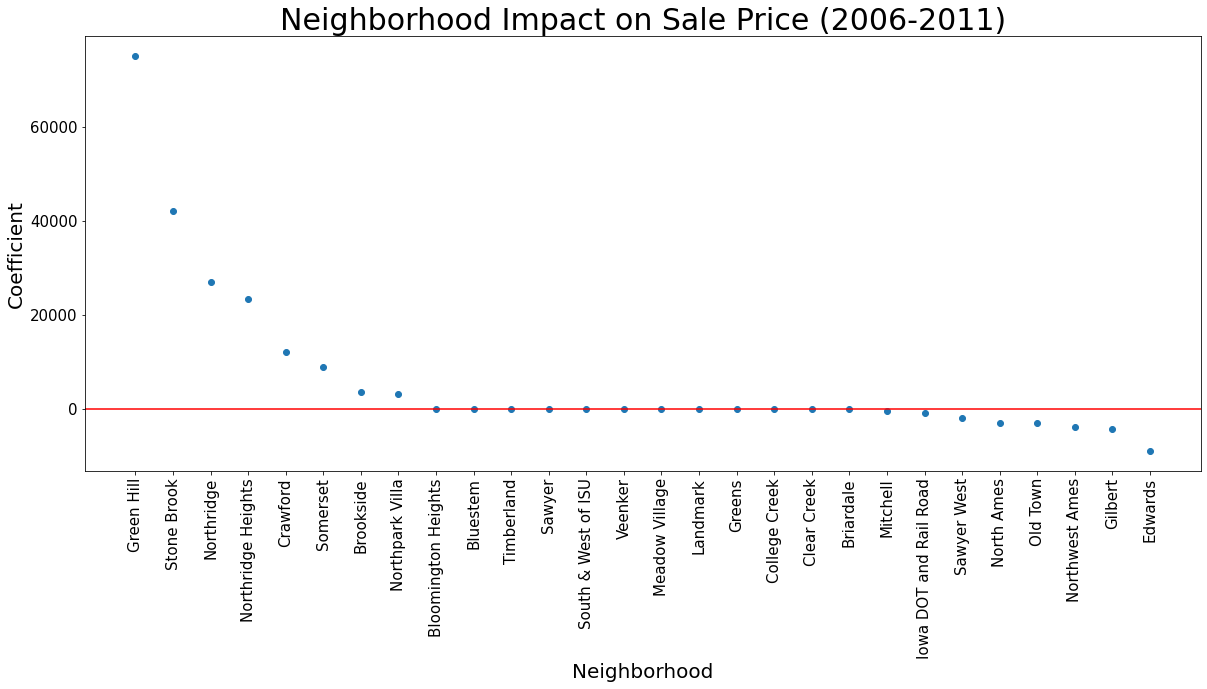

In [174]:
old_neighborhoods = ['cat__neighborhood_GrnHill',
                     'cat__neighborhood_StoneBr',
                     'cat__neighborhood_NoRidge',
                     'cat__neighborhood_NridgHt',
                     'cat__neighborhood_Crawfor',
                     'cat__neighborhood_Somerst',
                     'cat__neighborhood_BrkSide',
                     'cat__neighborhood_NPkVill',
                     'cat__neighborhood_Blmngtn', 
                     'cat__neighborhood_Blueste',
                     'cat__neighborhood_Timber',
                     'cat__neighborhood_Sawyer',
                     'cat__neighborhood_SWISU',
                     'cat__neighborhood_Veenker',
                     'cat__neighborhood_MeadowV',
                     'cat__neighborhood_Landmrk',
                     'cat__neighborhood_Greens',
                     'cat__neighborhood_CollgCr',
                     'cat__neighborhood_ClearCr',
                     'cat__neighborhood_BrDale',
                     'cat__neighborhood_Mitchel',
                     'cat__neighborhood_IDOTRR',
                     'cat__neighborhood_SawyerW',
                     'cat__neighborhood_NAmes',
                     'cat__neighborhood_OldTown',
                     'cat__neighborhood_NWAmes',
                     'cat__neighborhood_Gilbert',
                     'cat__neighborhood_Edwards']

new_neighborhoods = ['Green Hill',
                 'Stone Brook',
                 'Northridge',
                 'Northridge Heights',
                 'Crawford',
                 'Somerset',
                 'Brookside',
                 'Northpark Villa',
                 'Bloomington Heights',
                 'Bluestem',
                 'Timberland',
                 'Sawyer',
                 'South & West of ISU',
                 'Veenker',
                 'Meadow Village',
                 'Landmark',
                 'Greens',
                 'College Creek',
                 'Clear Creek',
                 'Briardale',
                 'Mitchell',
                 'Iowa DOT and Rail Road',
                 'Sawyer West',
                 'North Ames',
                 'Old Town',
                 'Northwest Ames',
                 'Gilbert',
                 'Edwards']

plt.figure(figsize=(20,8))
plt.scatter(lassocv_coefs_nbrh_srt['feature'], lassocv_coefs_nbrh_srt['coefficient'])
plt.xticks(old_neighborhoods, new_neighborhoods, rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title('Neighborhood Impact on Sale Price (2006-2011)', fontsize=30)
plt.xlabel('Neighborhood', fontsize=20)
plt.ylabel('Coefficient', fontsize=20);

Of the 28 neighborhoods in Ames, IA, 8 were assigned a positive coefficient, 12 were eliminated and 8 were assigned a negative coefficient.

The top 5 neighborhoods that increase home value are:

   * Green Hills by 75.2k
   * Stone Brook by 42.3k
   * Northridge by 27.0k
   * Northridge Heights by 23.5k
   * Crawford by 12.1k

The bottom 5 neighborhoods that decrease home value are:

   * Edwards by 8.9k
   * Gilbert by 4.1k
   * Northwest Ames by 3.9k
   * Old Town by 3.0k
   * North Ames by 2.9k

In [259]:
# Home Features (excluding neighborhoods)
lassocv_coefs_no_nbrh = lassocv_coefs[~lassocv_coefs['feature'].str.contains('neighborhood')]
lassocv_coefs_no_nbrh_srt = lassocv_coefs_no_nbrh.sort_values(by='coefficient', ascending=False)
lassocv_coefs_no_nbrh_srt_top = lassocv_coefs_no_nbrh_srt.head(25)
lassocv_coefs_no_nbrh_srt_top

,feature,coefficient
96,cat__roof_matl_WdShngl,40655.768829
132,cat__exter_qual_Ex,31542.381898
195,cat__kitchen_qual_Ex,18862.020288
60,cat__condition_1_PosN,13991.119132
226,cat__garage_qual_Gd,13945.499830
100,cat__exterior_1st_BrkFace,13443.532049
277,num__2nd_flr_sf,13199.099598
250,cat__misc_feature_Gar2,11857.854076
206,cat__functional_Typ,11610.947950
160,cat__bsmt_exposure_Gd,11527.427402


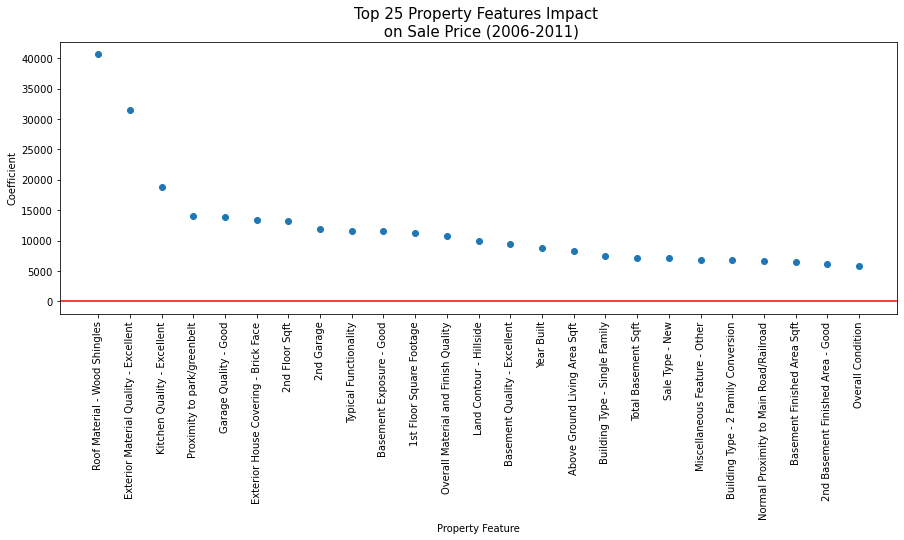

In [235]:
old_features_top = ['cat__roof_matl_WdShngl',
                'cat__exter_qual_Ex',
                'cat__kitchen_qual_Ex',
                'cat__condition_1_PosN',
                'cat__garage_qual_Gd',
                'cat__exterior_1st_BrkFace',
                'num__2nd_flr_sf',
                'cat__misc_feature_Gar2',
                'cat__functional_Typ',
                'cat__bsmt_exposure_Gd',
                'num__1st_flr_sf',
                'num__overall_qual',
                'cat__land_contour_HLS',
                'cat__bsmt_qual_Ex',
                'num__year_built',
                'num__gr_liv_area',
                'cat__bldg_type_1Fam',
                'num__total_bsmt_sf',
                'cat__sale_type_New',
                'cat__misc_feature_Othr',
                'cat__bldg_type_2fmCon',
                'cat__condition_1_Norm',
                'num__bsmtfin_sf_1',
                'cat__bsmtfin_type_2_GLQ',
                'num__overall_cond']

new_features_top = ['Roof Material - Wood Shingles',
                'Exterior Material Quality - Excellent',
                'Kitchen Quality - Excellent',
                'Proximity to park/greenbelt',
                'Garage Quality - Good',
                'Exterior House Covering - Brick Face',
                '2nd Floor Sqft',
                '2nd Garage',
                'Typical Functionality',
                'Basement Exposure - Good',
                '1st Floor Square Footage',
                'Overall Material and Finish Quality',
                'Land Contour - Hillside',
                'Basement Quality - Excellent',
                'Year Built',
                'Above Ground Living Area Sqft',
                'Building Type - Single Family',
                'Total Basement Sqft',
                'Sale Type - New',
                'Miscellaneous Feature - Other',
                'Building Type - 2 Family Conversion',
                'Normal Proximity to Main Road/Railroad',
                'Basement Finished Area Sqft',
                '2nd Basement Finished Area - Good',
                'Overall Condition']

plt.figure(figsize=(15,5))
plt.scatter(lassocv_coefs_no_nbrh_srt_top['feature'], lassocv_coefs_no_nbrh_srt_top['coefficient'])
plt.xticks(old_features_top, new_features_top, rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title('Top 25 Property Features Impact \n on Sale Price (2006-2011)', fontsize=15)
plt.xlabel('Property Feature', fontsize=10)
plt.ylabel('Coefficient', fontsize=10);

The top 5 home features that increase home value are:

   * Roof Material - Wood Shingle by 40.7k
   * Exterior Material Quality - Excellent by 31.5k
   * Kitchen Quality - Excellent by 18.9k
   * Proximity to a park/greenbelt by 14k
   * Garage Quality - Good by 14k

In [238]:
lassocv_coefs_no_nbrh = lassocv_coefs[~lassocv_coefs['feature'].str.contains('neighborhood')]
lassocv_coefs_no_nbrh_srt = lassocv_coefs_no_nbrh.sort_values(by='coefficient', ascending=False)
lassocv_coefs_no_nbrh_srt_bottom = lassocv_coefs_no_nbrh_srt.tail(25)
lassocv_coefs_no_nbrh_srt_bottom

,feature,coefficient
208,cat__fireplace_qu_Fa,-2846.045557
297,num__misc_val,-2859.615003
152,cat__bsmt_qual_TA,-3012.808807
167,cat__bsmtfin_type_1_LwQ,-3192.673835
10,cat__alley_Pave,-3200.652379
176,cat__bsmtfin_type_2_Rec,-3459.743524
264,num__ms_subclass,-3484.600253
135,cat__exter_qual_TA,-3652.797528
13,cat__lot_shape_IR3,-3691.233416
128,cat__mas_vnr_type_BrkFace,-3798.584064


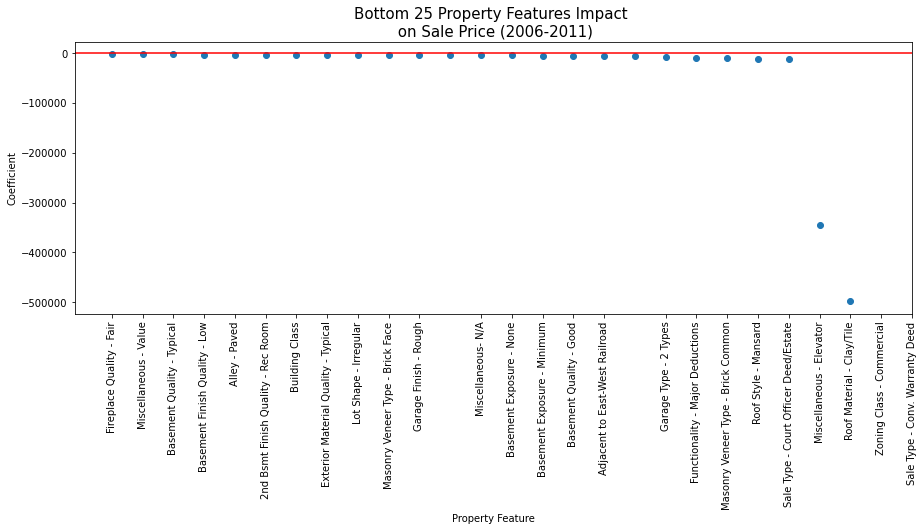

In [246]:
old_features_bottom = ['cat__fireplace_qu_Fa',
                       'num__misc_val',
                       'cat__bsmt_qual_TA',
                       'cat__bsmtfin_type_1_LwQ',
                       'cat__alley_Pave',
                       'cat__bsmtfin_type_2_Rec',
                       'num__ms_subclass',
                       'cat__exter_qual_TA',
                       'cat__lot_shape_IR3',
                       'cat__mas_vnr_type_BrkFace',
                       'cat__garage_finish_RFn',
                       'cat__ms_zoning_C',
                       'cat__misc_feature_NA',
                       'cat__bsmt_exposure_No',
                       'cat__bsmt_exposure_Mn',
                       'cat__bsmt_qual_Gd',
                       'cat__condition_1_RRAe',
                       'cat__sale_type_WD',
                       'cat__garage_type_2Types',
                       'cat__functional_Maj1',
                       'cat__mas_vnr_type_BrkCmn',
                       'cat__roof_style_Mansard',
                       'cat__sale_type_COD',
                       'cat__misc_feature_Elev',
                       'cat__roof_matl_ClyTile']

new_features_bottom = ['Fireplace Quality - Fair',
                      'Miscellaneous - Value',
                      'Basement Quality - Typical',
                      'Basement Finish Quality - Low',
                      'Alley - Paved',
                      '2nd Bsmt Finish Quality - Rec Room',
                      'Building Class',
                      'Exterior Material Quality - Typical',
                      'Lot Shape - Irregular',
                      'Masonry Veneer Type - Brick Face',
                      'Garage Finish - Rough',
                      'Zoning Class - Commercial',
                      'Miscellaneous- N/A',
                      'Basement Exposure - None',
                      'Basement Exposure - Minimum',
                      'Basement Quality - Good',
                      'Adjacent to East-West Railroad',
                      'Sale Type - Conv. Warranty Deed',
                      'Garage Type - 2 Types',
                      'Functionality - Major Deductions',
                      'Masonry Veneer Type - Brick Common',
                      'Roof Style - Mansard',
                      'Sale Type - Court Officer Deed/Estate',
                      'Miscellaneous - Elevator',
                      'Roof Material - Clay/Tile']

plt.figure(figsize=(15,5))
plt.scatter(lassocv_coefs_no_nbrh_srt_bottom['feature'], lassocv_coefs_no_nbrh_srt_bottom['coefficient'])
plt.xticks(old_features_bottom, new_features_bottom, rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title('Bottom 25 Property Features Impact \n on Sale Price (2006-2011)', fontsize=15)
plt.xlabel('Property Feature', fontsize=10)
plt.ylabel('Coefficient', fontsize=10);

The bottom 5 home features that decrease home value are:

   * Roof Material - Clay or Tile by 498.2k
   * Elevator by 345.2k
   * Court Officer Deed/Estate Sale Type by 12.7k
   * Roof Style - Mansard by 12.5k
   * Masonry Veneer Type - Brick Common by 10.9k

___

## Conclusion

### Recommendations

It's recommended that the city of Ames, IA invest in housing in the Green Hills, Stone Brook, Northridge, Northridge Heights and Crawford neighborhoods, and invest in more parks and green spaces.

The following housing features should also be considered:

   * Wood Shingle Roofing (and avoid Clay, Tile or a Mansard style)
   * Excellent Exterior Material Quality (and avoid  Common Brick)
   * Excellent Kitchen Quality
   * Good Garage Quality
   * Brick Face Exterior House Covering
   * Second Floor Square Footage
   * Avoiding unnecessary luxury features (elevator, 2 garages)

### Next Steps

It will be beneficial to gain a deeper understanding of how each rating is defined, if not already stated, for those categorical features that were ordinal. For example, the difference between average, god, excellent, etc. 

Also, given that the dataset of this analysis only contained observations ranging from 2006-2011, a follow-up analysis on an updated dataset is suggested to see if the findings of this analysis continue to hold true.

___

## Kaggle Submissions

In [70]:
test_id = ames_test['Id']

In [71]:
ames_test['Pool QC'].replace(np.nan, 'NA', inplace=True)
ames_test['Misc Feature'].replace(np.nan, 'NA', inplace=True)
ames_test['Alley'].replace(np.nan, 'NA', inplace=True)
ames_test['Fence'].replace(np.nan, 'NA', inplace=True)
ames_test['Fireplace Qu'].replace(np.nan, 'NA', inplace=True)
ames_test['Lot Frontage'].replace(np.nan, 0, inplace=True)
ames_test['Garage Finish'].replace(np.nan, 'NA', inplace=True)
ames_test['Garage Qual'].replace(np.nan, 'NA', inplace=True)
ames_test['Garage Yr Blt'].replace(np.nan, 0, inplace=True)
ames_test['Garage Cond'].replace(np.nan, 'NA', inplace=True)
ames_test['Garage Type'].replace(np.nan, 'NA', inplace=True)
ames_test['Bsmt Exposure'].replace(np.nan, 'NA', inplace=True)
ames_test['BsmtFin Type 2'].replace(np.nan, 'NA', inplace=True)
ames_test['BsmtFin Type 1'].replace(np.nan, 'NA', inplace=True)
ames_test['Bsmt Cond'].replace(np.nan, 'NA', inplace=True)
ames_test['Bsmt Qual'].replace(np.nan, 'NA', inplace=True)
ames_test['Mas Vnr Area'].replace(np.nan, 0, inplace=True)
ames_test['Mas Vnr Type'].replace(np.nan, 'NA', inplace=True)
ames_test['Bsmt Half Bath'].replace(np.nan, 0, inplace=True)
ames_test['Bsmt Full Bath'].replace(np.nan, 0, inplace=True)
ames_test['Garage Area'].replace(np.nan, 0, inplace=True)
ames_test['Total Bsmt SF'].replace(np.nan, 0, inplace=True)
ames_test['Bsmt Unf SF'].replace(np.nan, 0, inplace=True)
ames_test['BsmtFin SF 2'].replace(np.nan, 0, inplace=True)
ames_test['BsmtFin SF 1'].replace(np.nan, 0, inplace=True)
ames_test['Garage Cars'].replace(np.nan, 0, inplace=True)
ames_test['Electrical'].replace(np.nan, 'NA', inplace=True)

In [72]:
ames_test.columns = ames_test.columns.str.lower().str.replace(' ', '_')

In [73]:
ames_test.drop(columns = 'pid', inplace = True)

In [75]:
ames_test = transformer.transform(ames_test.drop(columns = 'id'))
ames_test = pd.DataFrame(ames_test, columns = transformer.get_feature_names_out(X_train.columns))

#### LassoCV #1 (Alpha = 46.4158883361278)

In [76]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xt_train, y_train)

Lasso(alpha=46.4158883361278)

In [77]:
preds = lasso.predict(ames_test)
preds = pd.DataFrame(preds, columns = ['SalePrice'])

In [78]:
preds.insert(loc = 0, column = 'id', value = test_id)
preds.head()

,id,SalePrice
0,2658,145854.005008
1,2718,148745.891767
2,2414,216887.441234
3,1989,106839.356967
4,625,174138.399643


In [79]:
preds.shape

(878, 2)

In [80]:
preds.to_csv('../submissions/lassocv_1.csv', index = False)